# Unit 1 Lab: Introduction to Data Analytics

**Focus:** Data exploration, descriptive statistics, simple cleaning using pandas. 

**Instructions:** Run each cell in order. Data is simulated inside the notebook so no download required.


In [5]:
import pandas as pd
import numpy as np
np.random.seed(42)

# Simulate a small dataset: student study hours and exam scores
data = pd.DataFrame({
    'StudentID': range(1,21),
    'StudyHours': np.round(np.random.normal(5, 2, 20).clip(0),1),
    'AttendancePercent': np.round(np.random.uniform(60,100,20),1),
    'ExamScore': np.round(np.random.normal(65, 12, 20).clip(0,100),1)
})

# Introduce some missing and inconsistent values
data.loc[3,'ExamScore'] = np.nan
data.loc[7,'StudyHours'] = np.nan

data.loc[10,'AttendancePercent'] = 'ninety'

data.head()

C:\Users\india\AppData\Local\Temp\ipykernel_27896\3169749513.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'ninety' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data.loc[10,'AttendancePercent'] = 'ninety'


,StudentID,StudyHours,AttendancePercent,ExamScore
0,1,6.0,78.2,74.9
1,2,4.7,91.4,50.3
2,3,6.3,68.0,67.5
3,4,8.0,80.6,NaN
4,5,4.5,83.7,49.1


## Task 1 — Inspect the data
- Look at the first 10 rows using `head()` and the dataframe info using `info()` and `describe()`.

In [6]:
data.info()

data.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          20 non-null     int64  
 1   StudyHours         19 non-null     float64
 2   AttendancePercent  20 non-null     object 
 3   ExamScore          19 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 772.0+ bytes


,StudentID,StudyHours,AttendancePercent,ExamScore
count,20.00000,19.000000,20.0,19.000000
unique,NaN,NaN,20.0,NaN
top,NaN,NaN,78.2,NaN
freq,NaN,NaN,1.0,NaN
mean,10.50000,4.568421,NaN,62.500000
std,5.91608,1.907894,NaN,9.885511
min,1.00000,1.200000,NaN,43.800000
25%,5.75000,3.550000,NaN,56.650000
50%,10.50000,4.500000,NaN,63.600000
75%,15.25000,5.800000,NaN,69.000000


## Task 2 — Clean the data
- Replace the string `'ninety'` with the numeric value `90` in `AttendancePercent`.
- Convert `AttendancePercent` column to numeric type.
- Decide how to handle missing values in `StudyHours` and `ExamScore` (drop or impute).

In [7]:
# Replace 'ninety' with 90 and convert to numeric
data['AttendancePercent'] = data['AttendancePercent'].replace('ninety', 90)
data['AttendancePercent'] = pd.to_numeric(data['AttendancePercent'], errors='coerce')

# Impute missing StudyHours with median, ExamScore with mean
data['StudyHours'] = data['StudyHours'].fillna(data['StudyHours'].median())
data['ExamScore'] = data['ExamScore'].fillna(data['ExamScore'].mean())

data.info()

data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          20 non-null     int64  
 1   StudyHours         20 non-null     float64
 2   AttendancePercent  20 non-null     float64
 3   ExamScore          20 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 772.0 bytes


C:\Users\india\AppData\Local\Temp\ipykernel_27896\3286551580.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['AttendancePercent'] = data['AttendancePercent'].replace('ninety', 90)


,StudentID,StudyHours,AttendancePercent,ExamScore
0,1,6.0,78.2,74.9
1,2,4.7,91.4,50.3
2,3,6.3,68.0,67.5
3,4,8.0,80.6,62.5
4,5,4.5,83.7,49.1


## Task 3 — Descriptive Statistics & Visualization
- Compute mean, median, std for `ExamScore`.
- Plot a histogram of `ExamScore` and scatter plot `StudyHours` vs `ExamScore`. (Matplotlib/Seaborn)

Mean ExamScore: 62.500000000000014
Median ExamScore: 63.05
Std ExamScore: 9.62185013393994


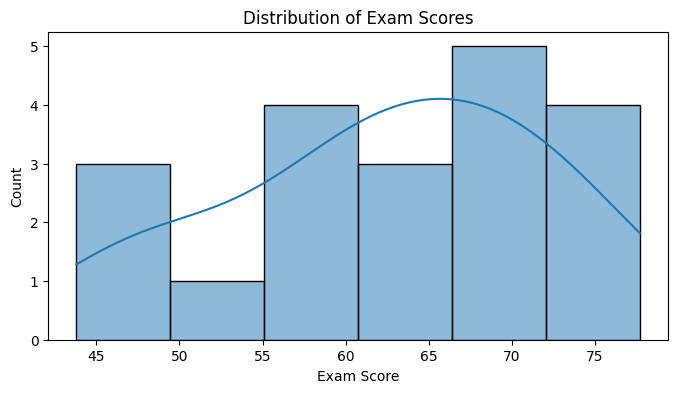

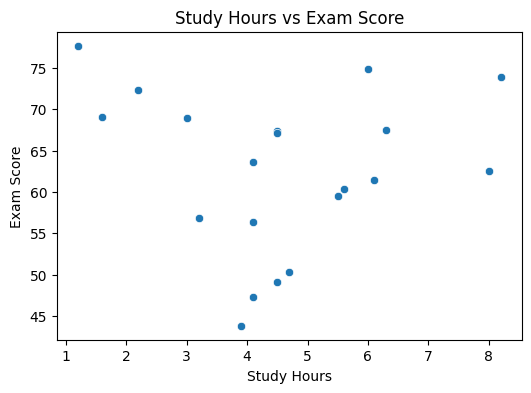

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

print('Mean ExamScore:', data['ExamScore'].mean())
print('Median ExamScore:', data['ExamScore'].median())
print('Std ExamScore:', data['ExamScore'].std())

plt.figure(figsize=(8,4))
sns.histplot(data['ExamScore'], kde=True)
plt.title('Distribution of Exam Scores')
plt.xlabel('Exam Score')
plt.show()

plt.figure(figsize=(6,4))
sns.scatterplot(x='StudyHours', y='ExamScore', data=data)
plt.title('Study Hours vs Exam Score')
plt.xlabel('Study Hours')
plt.ylabel('Exam Score')
plt.show()

## Task 4 — Short Reflection
- Write one sentence: Did study hours appear related to exam score in this simulated dataset?


---
## Trainer's Answers & Expected Outputs — Unit 1 Lab

**Task 1 — Inspect the data**  
- `data.info()` should show 4 columns: StudentID, StudyHours, AttendancePercent, ExamScore. Some non-null counts < 20 due to introduced missing values.  
- `data.describe()` will show statistical summaries; expect mean ExamScore around mid-60s (since simulated with mean 65), StudyHours mean around ~5.

**Task 2 — Clean the data**  
- After replacing `'ninety'` and converting, `AttendancePercent` dtype should be numeric (float).  
- Missing `StudyHours` filled with median value (check `data['StudyHours'].median()` before fill).  
- Missing `ExamScore` filled with mean (check `data['ExamScore'].mean()` used for imputation).

**Task 3 — Descriptive Statistics & Visualization**  
- Mean, median, std printed; these will vary slightly due to randomness but expect mean ≈ 65, std ≈ 10-15.  
- Histogram: roughly bell-shaped distribution (because of normal simulation).  
- Scatter plot `StudyHours` vs `ExamScore`: expect a weak positive relationship (more study hours tends to slightly increase score).

**Grading / Discussion Tips:**  
- Verify students ran all cells and performed conversions properly.  
- Check that imputation was done and types are numeric.  
- Look for interpretation in reflection: correct answer mentions whether trend exists and caveat about simulation/randomness.
---
